## Module 6 Practice - Choropleth Maps


In this notebook, we will see examples of **choropleth maps** using ggplot.

Maps are represented by very **detailed polygons in vector form** as we have seen in the [L6 Projections Practice](L6_Projections_Practice.ipynb). 


First, let's start with simple polygons and see how to define and draw them. 

To color polygons, we usually need **two data frames**: 

 - one contains the **coordinates** of each polygon (positions),  
 
 - and the other one contains the **values** associated with each polygon (values).  
 
A **common variable** (id) links the two together. 


In [1]:
library(ggplot2)
library(maps)
library(ggmap)
library(mapproj)

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [2]:
# Some made up IDs; these connect values to polygons
ids <- factor(c("1.1", "2.1", "1.2", "2.2", "1.3", "2.3"))

# Some made up values: the colors will represent these values 
values <- data.frame(some_column = ids, value = c(3, 3.1, 3.1, 3.2, 3.15, 3.5))

# coordinates of some polygons
positions <- data.frame(id = rep(ids, each = 4),
  x = c(2, 1, 1.1, 2.2, 1, 0, 0.3, 1.1, 2.2, 1.1, 1.2, 2.5, 1.1, 0.3,
  0.5, 1.2, 2.5, 1.2, 1.3, 2.7, 1.2, 0.5, 0.6, 1.3),
  y = c(-0.5, 0, 1, 0.5, 0, 0.5, 1.5, 1, 0.5, 1, 2.1, 1.7, 1, 1.5,
  2.2, 2.1, 1.7, 2.1, 3.2, 2.8, 2.1, 2.2, 3.3, 3.2))

head(values)
head(positions)

some_column,value
<fct>,<dbl>
1.1,3.00
2.1,3.10
1.2,3.10
2.2,3.20
1.3,3.15
2.3,3.50


id,x,y
<fct>,<dbl>,<dbl>
1.1,2.0,-0.5
1.1,1.0,0.0
1.1,1.1,1.0
1.1,2.2,0.5
2.1,1.0,0.0
2.1,0.0,0.5


**Let's draw and color them:** `map_id` is what associates the two data frames. `geom_map` expects to have either (long,lat,group) or (x,y,id) variable names in the map data. Here, we have the latter. 

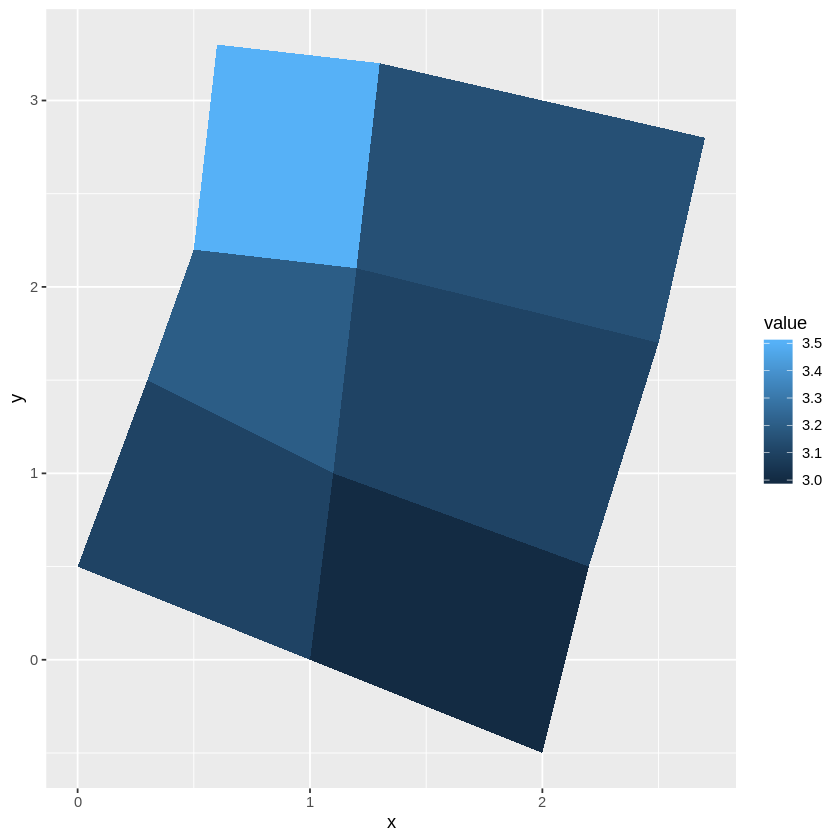

In [3]:
ggplot(data=values, aes(fill=value)) +

geom_map(map=positions, aes(map_id=some_column)) +

expand_limits(positions)


We associated the map and the values by telling `geom_map` the column `some_column` in the data frame is same as the `id` (or `region`) column in the map data frame. 

---

**Now, let's do the same for US map to visualize the crime data set.** 

**Important:** We will use state name as the **common variable** so they have to match to the state names in the map data.

In [4]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


First create **lowercase state names**, because these will be the "IDs" that will connect 
the crimes data to the map data. 


Since map data also contains lowercase state names and their polygon coordinates, **we will use the lowercase state name as the common ID.** 

In [5]:
crimes <- data.frame(state = tolower(rownames(USArrests)), USArrests)

In [6]:
# convert arrest variables in the columns to a single column to enable faceting later. 
crimesm <- reshape2::melt(crimes[,c(1,2,3,5)], id = 1)
head(crimes)
head(crimesm)

,state,Murder,Assault,UrbanPop,Rape
,<fct>,<dbl>,<int>,<int>,<dbl>
Alabama,alabama,13.2,236,58,21.2
Alaska,alaska,10.0,263,48,44.5
Arizona,arizona,8.1,294,80,31.0
Arkansas,arkansas,8.8,190,50,19.5
California,california,9.0,276,91,40.6
Colorado,colorado,7.9,204,78,38.7


state,variable,value
<fct>,<fct>,<dbl>
alabama,Murder,13.2
alaska,Murder,10.0
arizona,Murder,8.1
arkansas,Murder,8.8
california,Murder,9.0
colorado,Murder,7.9


In [7]:
# Get the map data for US states
states_map <- map_data("state")

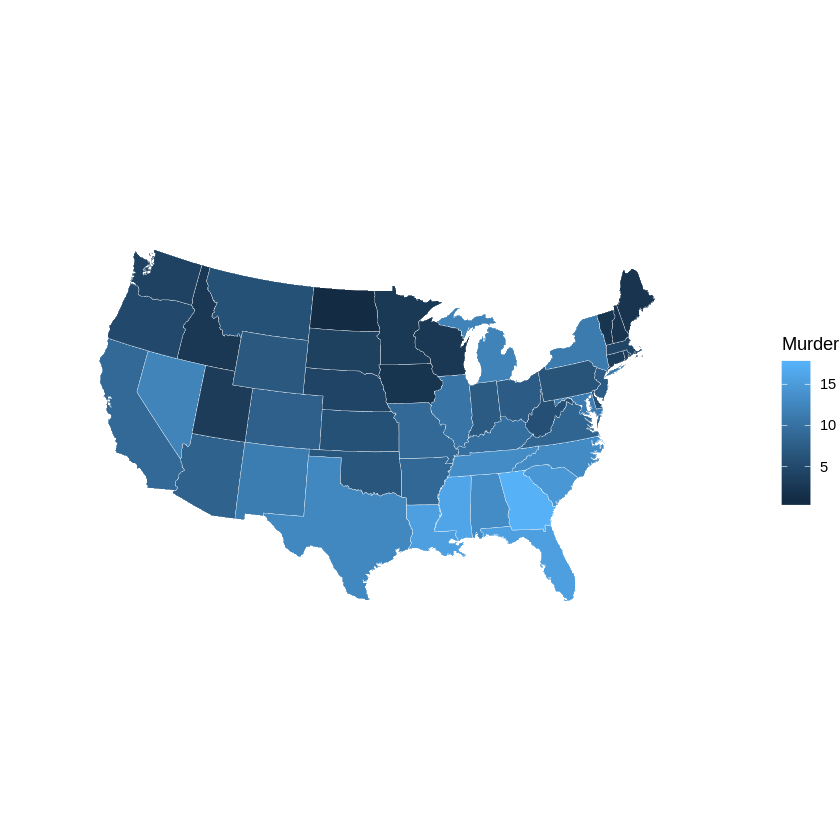

In [8]:
# color will encode Murder 
gg <- ggplot(data=crimes) + 

# "state" is the common variable, associate it to "region" variable in the map 
geom_map(map=states_map, aes(map_id=state, fill=Murder), color="white", size=0.1) +

# coordinate limits of the map 
expand_limits(x=states_map$long, y=states_map$lat) + 

# useful map projection 
coord_map("polyconic") +

# remove grid and coord info 
theme_void() 

gg

**Now this is a choropleth map.** 


We can also do small multiples of maps like this: 

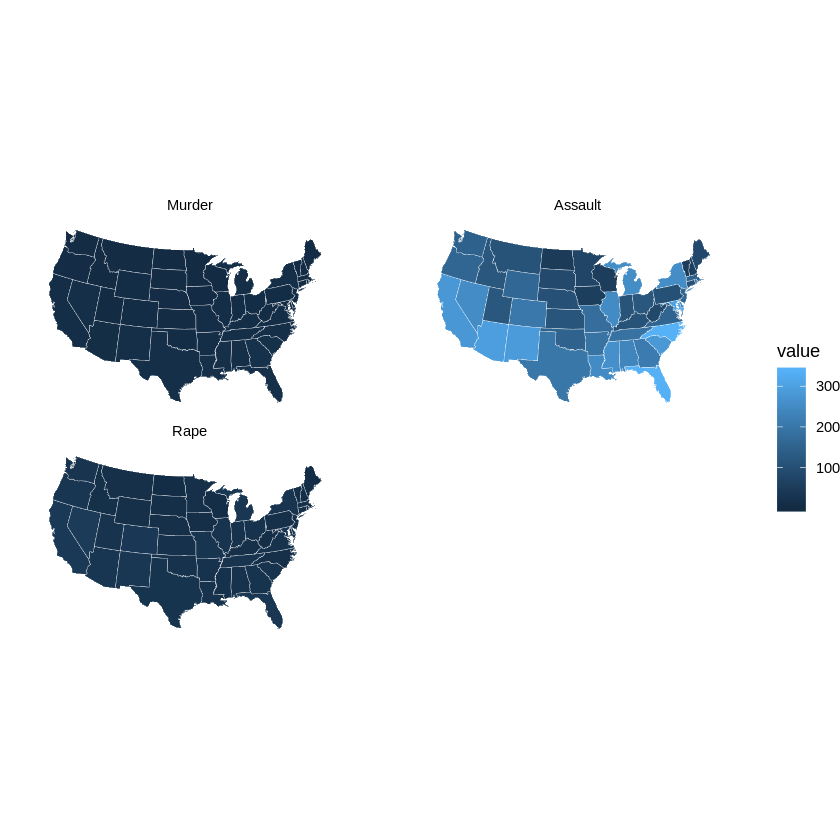

In [9]:
ggplot(data=crimesm, aes(fill=value)) +

geom_map(map=states_map, aes(map_id = state), color="white", size=0.1) +

expand_limits(x = states_map$long, y = states_map$lat) +

facet_wrap(~variable, ncol=2) + 

coord_map("polyconic") +

theme_void()

### YOUR TURN:

**Create a choropleth map for population using the crimes data set. Use `YlOrRd` palette from brewer library and make sure that DARKER colors represent LARGER population numbers.**


(Hint: You'll have to do some digging on Internet to figure out how to use the `YlOrRd` for a continuous variable in the right order. Start by looking at `scale_fill_` functions.)

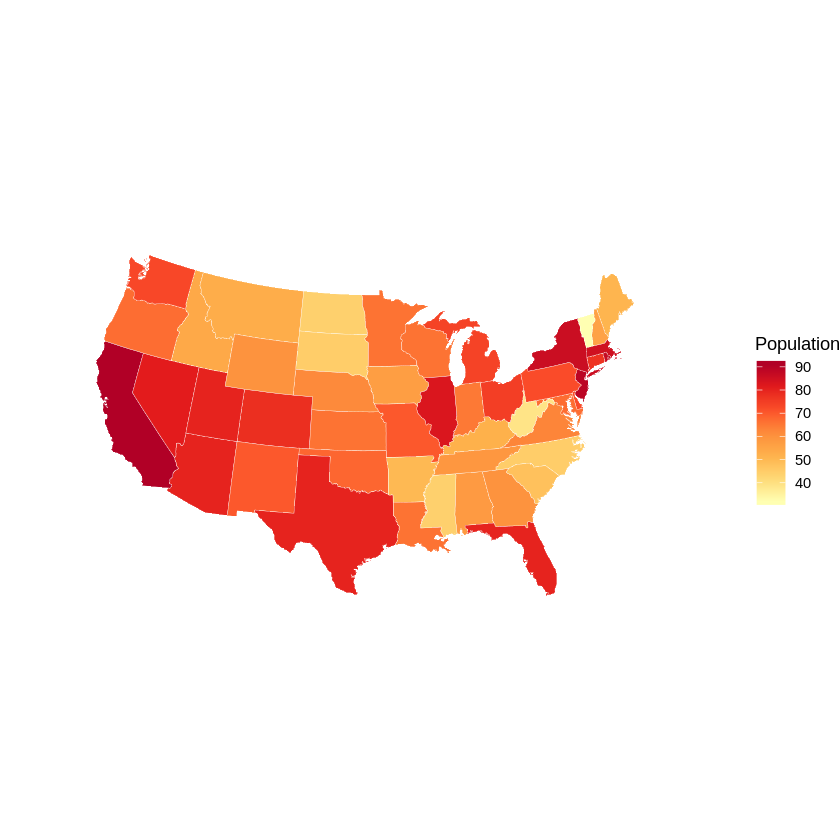

In [57]:
#< YOUR CODE HERE >
library(RColorBrewer)
colourCount = length(unique(crimes$UrbanPop))

ggplot(data = crimes, aes(fill = UrbanPop), color = "YlOrRd") + 
geom_map(map = states_map, aes(map_id = state), color = "white", size = 0.1) + 
expand_limits(x = states_map$long, y = states_map$lat) + 
coord_map("polyconic") + 
#scale_colour_brewer(palette = "YlOrRd", direction = -1)
#scale_fill_gradientn(colors = rev(brewer.pal(3, "YlOrRd")))
#scale_fill_manual(values = rev(brewer.pal(3, "YlOrRd")))
#scale_fill_manual(values = colorRampPalette(brewer.pal(3, "YlOrRd"))(colourCount)) + 
#scale_fill_continuous(palette = "YlOrRd", trans = "reverse") + 
scale_fill_distiller(name = "Population", palette = "YlOrRd", direction = 1) + 

theme_void() + 
theme(legend.title.align = 1)

---

**Let's get another data set and work on it.** 

In [43]:
agex <- read.csv("/dsa/data/all_datasets/2011_us_ag_exports.csv")
head(agex)

code,state,category,total.exports,beef,pork,poultry,dairy,fruits.fresh,fruits.proc,total.fruits,veggies.fresh,veggies.proc,total.veggies,corn,wheat,cotton
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95
CO,Colorado,state,1851.33,261.4,66.0,14.0,71.94,5.7,12.2,17.99,45.1,73.2,118.27,183.2,400.5,0.00


In [44]:
library(dplyr) 
# Let's create lowercase state names 
agex <- mutate(agex, state = tolower(state))
head(agex)

code,state,category,total.exports,beef,pork,poultry,dairy,fruits.fresh,fruits.proc,total.fruits,veggies.fresh,veggies.proc,total.veggies,corn,wheat,cotton
<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL,alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
AK,alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
AZ,arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
AR,arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
CA,california,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95
CO,colorado,state,1851.33,261.4,66.0,14.0,71.94,5.7,12.2,17.99,45.1,73.2,118.27,183.2,400.5,0.00


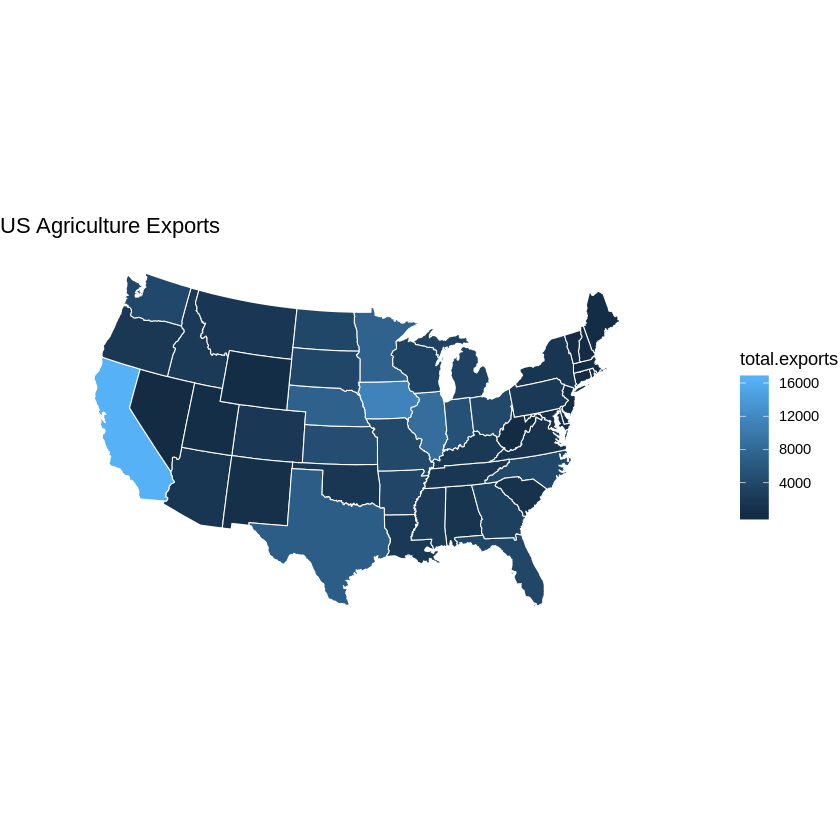

In [45]:
# Let's draw and color them
g_ex <- ggplot() +

 geom_map(data=agex, map=states_map, aes(fill=total.exports, map_id=state), color="white", size=0.3) +

 expand_limits(x = states_map$long, y = states_map$lat) +

 coord_map("polyconic") +

 theme_void() +

 ggtitle("US Agriculture Exports") 

g_ex

We may prefer to represent the highest number by the darkest color. So, we need to change the direction of the palette: 

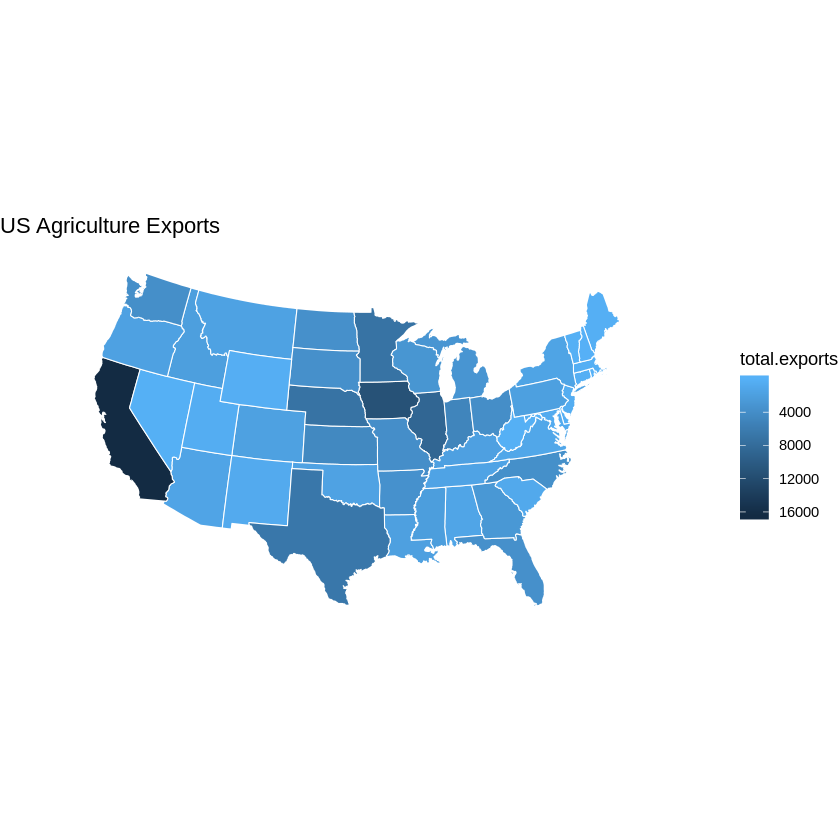

In [46]:
g_ex + scale_fill_continuous(trans="reverse")

In [50]:
# Pick a few variables from the data set 
sub <- agex[, c(2,14,15,16,17)]
head(sub)
# melt them into a single variable
subm <- reshape2::melt(sub, id = 1)
head(subm)

state,total.veggies,corn,wheat,cotton
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
alabama,14.33,34.9,70.0,317.61
alaska,1.56,0.0,0.0,0.00
arizona,386.91,7.3,48.7,423.95
arkansas,11.45,69.5,114.5,665.44
california,2106.79,34.6,249.3,1064.95
colorado,118.27,183.2,400.5,0.00


state,variable,value
<chr>,<fct>,<dbl>
alabama,total.veggies,14.33
alaska,total.veggies,1.56
arizona,total.veggies,386.91
arkansas,total.veggies,11.45
california,total.veggies,2106.79
colorado,total.veggies,118.27


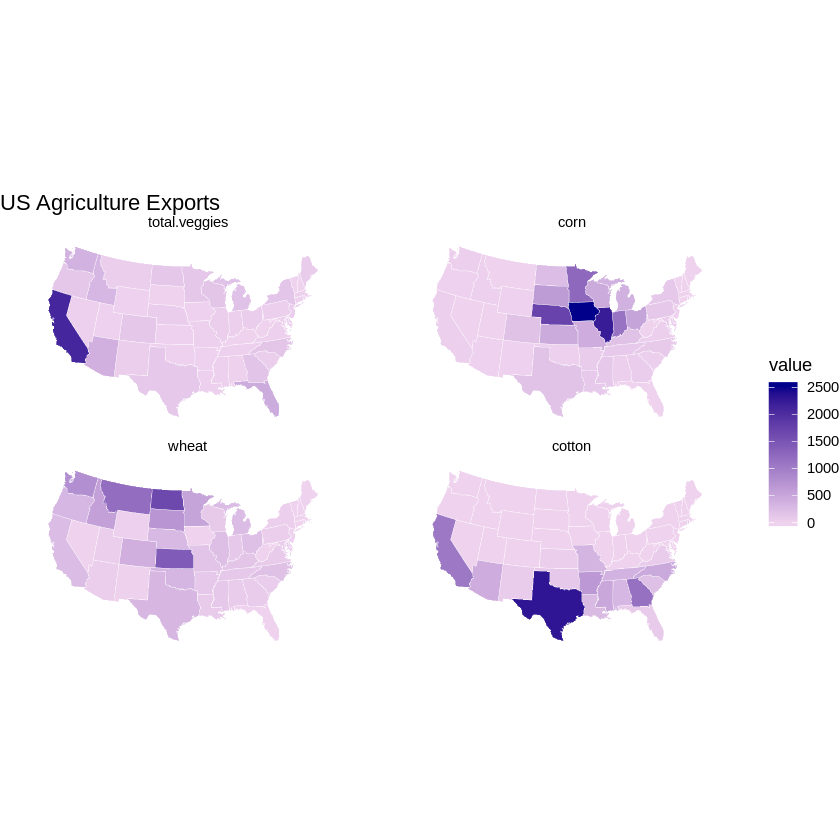

In [51]:
ggplot(subm) +

geom_map(map=states_map, aes(map_id=state, fill=value),  color="white", size=0.1) +

scale_fill_continuous(low='thistle2', high='darkblue') +

facet_wrap(~variable, ncol=2) +

expand_limits(x = states_map$long, y = states_map$lat) + 
coord_map("polyconic") + 
theme_void() +
#theme(legend.position="None") + 
ggtitle("US Agriculture Exports") 


**Let's compare the percentage contributions of states for each product instead of actual numbers. It might be more or less meaningful depending on the visual task.**

In [52]:
subp <- sub
subp <-mutate(subp, corn=corn/sum(corn))
subp <-mutate(subp, wheat=wheat/sum(wheat))
subp <-mutate(subp, cotton=cotton/sum(cotton))
subp <-mutate(subp, total.veggies=total.veggies/sum(total.veggies))
subpm <- reshape2::melt(subp, id = 1)

### YOUR TURN:  

**Copy and paste the small multiples plotting code from above and run. Compare the colors of both maps.** 

 - **Which one seems to be more truthful to the data ?**
 - What kind of scales should we use for color palettes to make it easier for comparison, but also represent the data truthfully? 
 

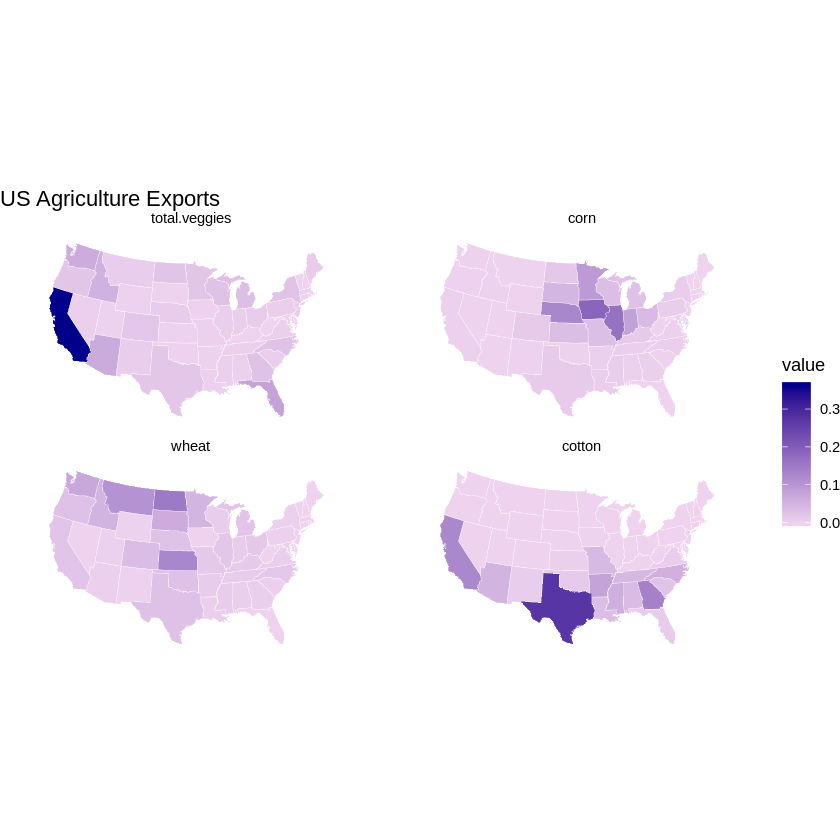

In [53]:
#copy code here and run 
ggplot(subpm) +

geom_map(map=states_map, aes(map_id=state, fill=value),  color="white", size=0.1) +

scale_fill_continuous(low='thistle2', high='darkblue') +

facet_wrap(~variable, ncol=2) +

expand_limits(x = states_map$long, y = states_map$lat) + 
coord_map("polyconic") + 
theme_void() +
#theme(legend.position="None") + 
ggtitle("US Agriculture Exports") 



If there is a dominating value in a data set, we can apply a log or sqrt transform to our palette to better show the variation in the smaller values. 

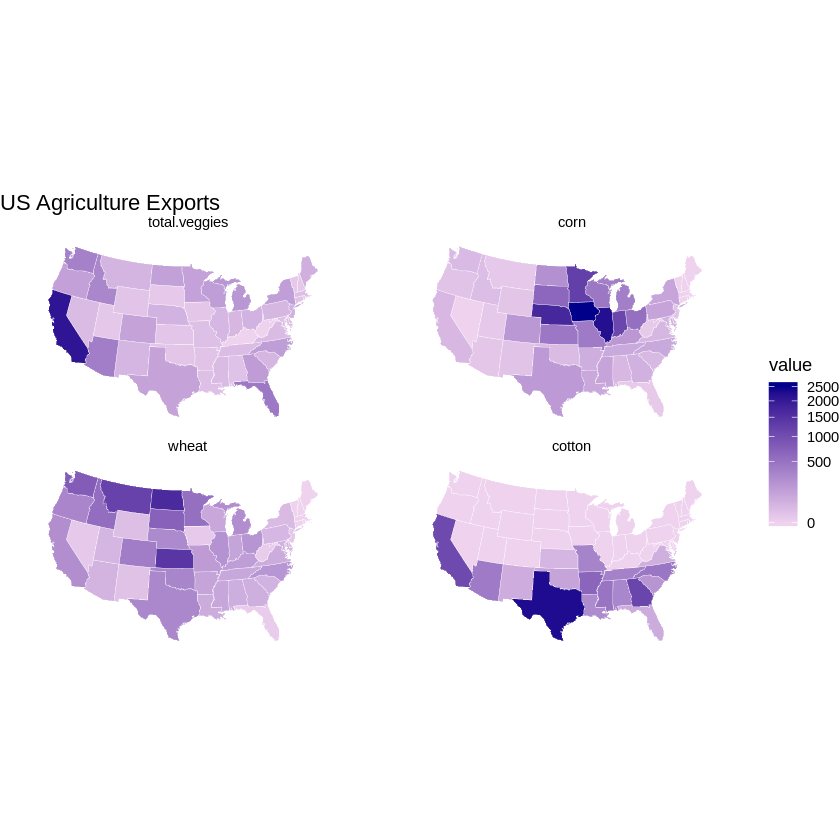

In [54]:
ggplot(subm) +
geom_map(map=states_map, aes(map_id=state, fill=value),  color="white", size=0.1) +
expand_limits(x = states_map$long, y = states_map$lat) + 
scale_fill_continuous(low='thistle2', high='darkblue', trans="sqrt") +
coord_map("polyconic") + 
facet_wrap(~variable, ncol=2) +
theme_void() +
#theme(legend.position="None") + 
ggtitle("US Agriculture Exports") 

**Is this better or truthful?**

**Choosing color palettes, transforms, and limits for choropleth maps is tricky; since human visual system cannot efficiently make direct comparisons of color shades, we can easily undermine or exaggerate the representation of the values in the choropleth maps.**

